In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importamos todas las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import plotly
import plotly.express as px
import xgboost as xgb
from matplotlib import style
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing


#para los modelos de regresion
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

#para los modelos de redes neuronales
#from tensorflow.keras import Model, Input
#from tensorflow.keras import layers
#from tensorflow.keras.metrics import AUC
#from tensorflow.keras.utils import to_categorical
# from xgboost import XGBRegressor

#math
from statistics import mean
from math import sqrt
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

pip install shap

In [3]:
# Funcion para calcular la distancia entre dos puntos a través de la función haversine,
# esto nos permite convertir coordenadas en unidades de distancia
from math import radians, cos, sin, asin, sqrt
def DistanciaGPS (lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convertimos grados decimales en radianes
           
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Se utiliza la formula Haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [4]:
#Funcion Dummy
# Definimos la función que nos ayudara a crear los dummies para alimentar el modelo

def dummy_convert (df,ID_ESTRUC):

    estruturas = pd.get_dummies(df[ID_ESTRUC], prefix = ID_ESTRUC)
    df = pd.concat([df, estruturas], axis = 1, )

    return df

In [5]:
df=pd.ExcelFile('Dataset5.xlsx')
df1 = pd.read_excel(df, na_values='?')
df1.head()

,TKNUM,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,Fec. Prod,Doc. Transporte,Estado,Placa,Cliente,Descripción de Obra,Pto. Exped,V. Entregado,H. Program,Tiempo de Proceso 1,Tiempo de Proceso 2,Tiempo Proceso Minutos,Traslado a Obra 1,Traslado a Obra 2,Tiempo Translado Minutos,Espera en Obra 1,Espera en Obra 2,Tiempo Espera Minutos,Descarga en Obra 1,Descarga en Obra 2,Tiempo Descarga Minutos,Retorno as Planta 1,Retorno as Planta 2,Tiempo Retorno Planta Minutos,Dif. Total,Reconstruido,WERK LAT,WERK LON,Código de Obra,OBRA LON,OBRA LAT,DESCRIPCION,Fecha_DiaSem,FinSemana,FinMes,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,T.Ciclo WT,T.Ciclo Calc (T5-PROD),Asentamiento,Asentamiento_Agr,Tipo Obra,Tipo Estructura,Tipo Estructura Negocio,FRANJA_HORARIA
0,1732932,1213,05.08.2019,50006802,9000038274,004-01588,C210-I-H57-A4,16,1,1,200399000,2001325815,2019-08-06 08:44:00,1732932,-1/Llegada a Planta,T3H-928,S/C,816098,DINO TRUJILLO NORTE,8.0,2019-08-03 07:00:00,NaT,2019-08-06 07:54:00,-,2019-08-06 07:54:00,2019-08-06 11:40:00,03:46:00,2019-08-06 11:40:00,2019-08-06 11:56:00,00:16:00,2019-08-06 11:56:00,2019-08-06 12:49:00,00:53:00,2019-08-06 12:49:00,2019-08-06 12:51:00,00:02:00,06:06:00,NaN,-8.053661,-79.061618,9000038274,-79.063383,-8.059475,PISOS,2,0,0,NaN,226.0,16.0,53,2.0,NaN,247,A3,A3,Pequeña,5,3,2
1,1742807,1213,21.08.2019,11588638,9000033374,004-01626,C280-MS-H67-A5,16,1,1,200401326,2001332963,2019-08-21 08:28:00,1742807,-1/Llegada a Planta,T8W-933,S/C,816615,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 09:47:00,-,2019-08-21 09:47:00,2019-08-21 10:12:00,00:25:00,2019-08-21 10:12:00,2019-08-21 10:42:00,00:30:00,2019-08-21 10:42:00,2019-08-21 11:03:00,00:21:00,2019-08-21 11:03:00,2019-08-21 11:29:00,00:26:00,05:00:00,NaN,-8.053661,-79.061618,9000033374,-79.099240,-8.102218,PISOS,3,0,0,NaN,25.0,30.0,21,26.0,NaN,181,A3,A3,Pequeña,5,3,2
2,1742809,1213,21.08.2019,13171955,9000030626,004-02808,M1:5-I-A5,18,17,2,200401413,2001332965,2019-08-21 08:34:00,1742809,-1/Llegada a Planta,ASN-882,S/C,809638,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 10:03:00,-,2019-08-21 10:03:00,2019-08-21 10:41:00,00:38:00,2019-08-21 10:41:00,2019-08-21 10:44:00,00:03:00,2019-08-21 10:44:00,2019-08-21 12:21:00,01:37:00,2019-08-21 12:21:00,2019-08-21 13:09:00,00:48:00,04:19:00,NaN,-8.053661,-79.061618,9000030626,-79.034438,-8.140475,CONTRAPISO,3,0,0,NaN,38.0,3.0,97,48.0,NaN,275,A3,A3,Pequeña,7,4,2
3,1742817,1203,21.08.2019,50010990,9000034745,004-01773,C280-MS-H57-A5,16,2,2,200401350,2001332977,2019-08-21 08:43:00,1742817,-1/Llegada a Planta,B2R-918,S/C,814583,DINO PIURA,NaN,NaT,NaT,2019-08-21 10:02:00,-,2019-08-21 10:02:00,2019-08-21 10:10:00,00:08:00,2019-08-21 10:10:00,2019-08-21 10:32:00,00:22:00,2019-08-21 10:32:00,2019-08-21 11:00:00,00:28:00,2019-08-21 11:00:00,2019-08-21 11:12:00,00:12:00,04:28:00,NaN,-5.164840,-80.718861,9000034745,-80.689045,-5.160834,PISOS,3,0,0,NaN,8.0,22.0,28,12.0,NaN,149,A3,A3,Pequeña,5,2,2
4,1742824,1213,21.08.2019,11588638,9000033374,004-01626,C280-MS-H67-A5,16,1,1,200401326,2001332984,2019-08-21 08:49:00,1742824,-1/Llegada a Planta,ATN-707,S/C,816615,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 07:35:00,-,2019-08-21 07:35:00,2019-08-21 08:03:00,00:28:00,2019-08-21 08:03:00,2019-08-21 08:20:00,00:17:00,2019-08-21 08:20:00,2019-08-21 08:38:00,00:18:00,2019-08-21 08:38:00,2019-08-21 09:01:00,00:23:00,02:04:00,NaN,-8.053661,-79.061618,9000033374,-79.099240,-8.102218,PISOS,3,0,0,NaN,28.0,17.0,18,23.0,NaN,12,A3,A3,Pequeña,5,3,2


In [6]:
# Podemos observar la cantidad de valores nulos que se encuentran en la data
df1.isnull().sum()

TKNUM                                 0
WERKS                                 0
FECHA_DESP                            0
KUNNR                                 0
IDEOBRA                               0
MATNR                                 0
FORMULA                               0
ID_ESTRUC                             0
ID_MODALIDAD                          0
ID_MODALIDAD_2                        0
VBELN_PED                             0
VBELN_ENTREGA                         0
Fec. Prod                             0
Doc. Transporte                       0
Estado                                0
Placa                                 0
Cliente                               0
Descripción de Obra                   0
Pto. Exped                            0
V. Entregado                         20
H. Program                           20
Tiempo de Proceso 1                8518
Tiempo de Proceso 2                   0
Tiempo Proceso Minutos              138
Traslado a Obra 1                     0


In [7]:
# Es necesario estandarizar el formato de las columnas y eliminar los espacios para trabajar de manera mas fluida
df1.columns

Index(['TKNUM  ', 'WERKS', 'FECHA_DESP', 'KUNNR     ', 'IDEOBRA   ', 'MATNR    ', 'FORMULA                       ', 'ID_ESTRUC', 'ID_MODALIDAD',
       'ID_MODALIDAD_2', 'VBELN_PED', 'VBELN_ENTREGA', 'Fec. Prod', 'Doc. Transporte', 'Estado', 'Placa', 'Cliente', 'Descripción de Obra',
       'Pto. Exped', 'V. Entregado', 'H. Program', 'Tiempo de Proceso 1', 'Tiempo de Proceso 2', 'Tiempo Proceso Minutos', 'Traslado a Obra 1',
       'Traslado a Obra 2', 'Tiempo Translado Minutos', 'Espera en Obra 1', 'Espera en Obra 2', 'Tiempo Espera Minutos', 'Descarga en Obra 1',
       'Descarga en Obra 2', 'Tiempo Descarga Minutos', 'Retorno as Planta 1', 'Retorno as Planta 2', 'Tiempo Retorno Planta Minutos', 'Dif. Total',
       'Reconstruido', 'WERK LAT', 'WERK LON', '  Código de Obra', 'OBRA LON', 'OBRA LAT', 'DESCRIPCION', 'Fecha_DiaSem', 'FinSemana', 'FinMes',
       'T.Proceso', 'T.Traslado', 'T.Espera', 'T.Descarga', 'T.Retorno', 'T.Ciclo WT', 'T.Ciclo Calc (T5-PROD)', 'Asentamiento', 'Asen

In [8]:
# procedemos a crear un diccionario con los nuevos valores de columnas
df1.rename(columns={'TKNUM  ' : 'TKNUM',
                    'WERKS' : 'WERKS',
                    'FECHA_DESP' : 'FECHA_DESP',
                    'KUNNR     ' : 'KUNNR',
                    'IDEOBRA   ' : 'IDEOBRA',
                    'MATNR    ' : 'MATNR',
                    'FORMULA                       ' : 'FORMULA',
                    'ID_ESTRUC' : 'ID_ESTRUC',
                    'ID_MODALIDAD' : 'ID_MODALIDAD',
                    'ID_MODALIDAD_2' : 'ID_MODALIDAD_2',
                    'VBELN_PED' : 'VBELN_PED',
                    'VBELN_ENTREGA' : 'VBELN_ENTREGA',
                    'Fec. Prod': 'FEC_PROD',
                    'Doc. Transporte' : 'DOC_TRANS',
                    '  Código de Obra' : 'OBRA_COD',
                    'DES_ESTRUCTURA' : 'DES_ESTRUCTURA',
                    'Estado': 'ESTADO',
                    'Placa': 'PLACA',
                    'Cliente': 'CLIENTE',
                    'Descripción de Obra': 'DESC_OBRA',
                    'Pto. Exped': 'PTO_EXPED',
                    'V. Entregado' : 'V_ENTREGADO',
                    'H. Program' : 'H_PROGRAM',
                    'Tiempo de Proceso 1' : 'TPROCESO1',
                    'Tiempo de Proceso 2' : 'TPROCESO2',
                    'Tiempo Proceso' : 'TPROCESO',
                    'Traslado a Obra 1' : 'TRASLADO1',
                    'Traslado a Obra 2' : 'TRASLADO 2',
                    'Tiempo Translado Minutos' : 'TRASLADO',                     
                    'Espera en Obra 1': 'ESPERA1',
                    'Espera en Obra 2': 'ESPERA2',
                    'Tiempo Espera Minutos': 'TESPERA',
                    'Descarga en Obra 1' : 'DESCARGA1',
                    'Descarga en Obra 2' : 'DESCARGA2',
                    'Tiempo Descarga Minutos': 'TDESCARGA',
                    'Retorno as Planta 1': 'RETORNO1',
                    'Retorno as Planta 2': 'RETORNO2',
                    'Tiempo Retorno Planta Minutos': 'TRETORNO',
                    'Dif. Total': 'DIFTOTAL',
                    'T.Proceso' : 'TPROCESOTOTAL',
                    'T.Traslado' : 'TTRASLADOTOTAL',
                    'T.Espera' : 'TESPERATOTAL',
                    'T.Descarga': 'TDESCARGATOTAL',
                    'T.Retorno' : 'TRETORNOTOTAL',
                    'Dia' : 'DIA',
                    'Fecha_DiaSem' : 'DIASEMANA',
                    'FinSemana' : 'FINSEMANA', 
                    'T.Ciclo Calc (T5-PROD)': 'T5PROD', 
                    'Asentamiento' : 'ASENT', 
                    'Asentamiento_Agr' : 'ASENTAGR',  
                    'Tipo Obra': 'OBRATIPO',
                    'Eliminar' : 'ELIMINAR',
                    'FinMes': 'FINMES',
                    'WERK LON' : 'WERK_LON',
                    'WERK LAT' : 'WERK_LAT' ,
                    'OBRA LAT': 'OBRA_LAT',
                    'OBRA LON' : 'OBRA_LON',
                    'Tipo Estructura' : 'TIPO_ESTRUC',
                    'Tipo Estructura Negocio' : 'TIPO_ESTRUC_NEG',
                    'FRANJA_HORARIA' : 'FRANJA_HORARIA'
                   },
            inplace=True)



In [9]:
# Creamos la columna distancia basandonos en la funcion definida para su calculo y se llenan las filas con los valores obtenidos
df1["DISTANCIA"]=df1.apply(lambda x: DistanciaGPS(x['WERK_LON'],x["WERK_LAT"],x["OBRA_LON"],x["OBRA_LAT"]),axis = 1)
# Redondeamos para tener valores enteros
df1["DISTANCIA"] = df1["DISTANCIA"].apply(np.round)
df1["DISTANCIA"]

0         1.0
1         7.0
2        10.0
3         3.0
4         7.0
         ... 
45678     9.0
45679     4.0
45680    28.0
45681     2.0
45682     9.0
Name: DISTANCIA, Length: 45683, dtype: float64

In [10]:
print(df1.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'ID_MODALIDAD_2', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'Reconstruido', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T.Ciclo WT', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'TIPO_ESTRUC', 'TIPO_ESTRUC_NEG', 'FRANJA_HORARIA', 'DISTANCIA']


In [11]:
#Eliminamos 20 valores nulos de la columna V_Entregado ya que no tienen relevancia estadística y son pedidos no procesados
df1.dropna(subset = ["V_ENTREGADO"], inplace=True)
index = df1[(df1['TDESCARGATOTAL'] >= 200)|(df1['TDESCARGATOTAL'] <= 6)].index
df1.drop(index, inplace=True)
index = df1[(df1['V_ENTREGADO'] >= 8.5)|(df1['V_ENTREGADO'] <= 0.5)].index
df1.drop(index, inplace=True)
index = df1[(df1['DISTANCIA'] >= 200)|(df1['DISTANCIA'] <= 1)].index
df1.drop(index, inplace=True)
index = df1[(df1['T5PROD'] >= 400)|(df1['T5PROD'] <= 20)].index
df1.drop(index, inplace=True)
index = df1[df1['WERKS'] == 1253].index
df1.drop(index, inplace=True)

df1.reset_index(drop=True, inplace=True)
df1

,TKNUM,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,FEC_PROD,DOC_TRANS,ESTADO,PLACA,CLIENTE,DESC_OBRA,PTO_EXPED,V_ENTREGADO,H_PROGRAM,TPROCESO1,TPROCESO2,Tiempo Proceso Minutos,TRASLADO1,TRASLADO 2,TRASLADO,ESPERA1,ESPERA2,TESPERA,DESCARGA1,DESCARGA2,TDESCARGA,RETORNO1,RETORNO2,TRETORNO,DIFTOTAL,Reconstruido,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DESCRIPCION,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T.Ciclo WT,T5PROD,ASENT,ASENTAGR,OBRATIPO,TIPO_ESTRUC,TIPO_ESTRUC_NEG,FRANJA_HORARIA,DISTANCIA
0,1743102,1213,21.08.2019,13171955,9000030626,004-03773,C210-MS-H8-A8/CV,8,17,2,200401413,2001333174,2019-08-21 13:36:00,1743102,-1/Llegada a Planta,ASN-882,S/C,809638,DINO TRUJILLO NORTE,5.0,2019-08-20 09:30:00,NaT,2019-08-21 14:59:00,-,2019-08-21 14:59:00,2019-08-21 15:33:00,00:34:00,2019-08-21 15:33:00,2019-08-21 15:33:00,1899-12-30 00:00:00,2019-08-21 15:33:00,2019-08-21 17:00:00,01:27:00,2019-08-21 17:00:00,2019-08-21 17:36:00,00:36:00,04:25:00,NaN,-8.053661,-79.061618,9000030626,-79.034438,-8.140475,PLACAS,3,0,0,NaN,34.0,NaN,87,36.0,NaN,240,A3,A3,Pequeña,6,4,3,10.0
1,1743105,1203,21.08.2019,50010990,9000034745,004-01773,C280-MS-H57-A5,16,2,2,200401350,2001333177,2019-08-21 13:47:00,1743105,-1/Llegada a Planta,T4M-876,S/C,814583,DINO PIURA,8.0,2019-08-20 08:00:00,NaT,2019-08-21 15:15:00,-,2019-08-21 15:15:00,2019-08-21 15:24:00,00:09:00,2019-08-21 15:24:00,2019-08-21 15:33:00,00:09:00,2019-08-21 15:33:00,2019-08-21 16:13:00,00:40:00,2019-08-21 16:13:00,2019-08-21 16:35:00,00:22:00,02:57:00,NaN,-5.164840,-80.718861,9000034745,-80.689045,-5.160834,PISOS,3,0,0,NaN,9.0,9.0,40,22.0,NaN,168,A3,A3,Pequeña,5,2,3,3.0
2,1743106,1213,21.08.2019,39760908,9000035521,004-03692,C210-I-H67-A5,3,2,2,200401410,2001333178,2019-08-21 13:48:00,1743106,-1/Llegada a Planta,T8W-924,S/C,814346,DINO TRUJILLO NORTE,4.0,2019-08-20 11:00:00,NaT,2019-08-21 15:10:00,-,2019-08-21 15:10:00,2019-08-21 15:32:00,00:22:00,2019-08-21 15:32:00,2019-08-21 15:40:00,00:08:00,2019-08-21 15:40:00,2019-08-21 15:59:00,00:19:00,2019-08-21 15:59:00,2019-08-21 17:00:00,01:01:00,03:16:00,NaN,-8.053661,-79.061618,9000035521,-79.029655,-8.107172,ZAPATAS,3,0,0,NaN,22.0,8.0,19,61.0,NaN,192,A3,A3,Pequeña,3,2,3,7.0
3,1743111,1203,21.08.2019,50011903,9000033156,004-01611,C175-I-H67-A5,12,2,2,200401312,2001333183,2019-08-21 14:04:00,1743111,-1/Llegada a Planta,F6N-933,S/C,807926,DINO PIURA,8.0,2019-08-20 14:30:00,NaT,2019-08-21 15:28:00,-,2019-08-21 15:28:00,2019-08-21 15:46:00,00:18:00,2019-08-21 15:46:00,2019-08-21 16:06:00,00:20:00,2019-08-21 16:06:00,2019-08-21 16:55:00,00:49:00,2019-08-21 16:55:00,2019-08-21 17:14:00,00:19:00,02:51:00,NaN,-5.164840,-80.718861,9000033156,-80.668644,-5.171846,MUROS,3,0,0,NaN,18.0,20.0,49,19.0,NaN,190,A3,A3,Mediana,6,2,3,6.0
4,1743119,1213,21.08.2019,13171955,9000036127,004-01642,C210-MS-H67-A7,11,17,2,200401411,2001333190,2019-08-21 14:26:00,1743119,-1/Llegada a Planta,T8O-918,S/C,814313,DINO TRUJILLO NORTE,8.0,2019-08-20 13:00:00,NaT,2019-08-21 15:49:00,-,2019-08-21 15:49:00,2019-08-21 16:07:00,00:18:00,2019-08-21 16:07:00,2019-08-21 16:19:00,00:12:00,2019-08-21 16:19:00,2019-08-21 17:04:00,00:45:00,2019-08-21 17:04:00,2019-08-21 17:22:00,00:18:00,02:46:00,NaN,-8.053661,-79.061618,9000036127,-79.037930,-8.102648,LOSA ALIGERADA,3,0,0,NaN,18.0,12.0,45,18.0,NaN,176,A3,A3,Pequeña,4,4,3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36255,2029629,1209,30.12.2020,1800000731,9000034125,004-03692,C210-I-H67-A5,23,2,2,200457829,2001490568,2020-12-30 15:52:00,2029629,-1/Llegada a Planta,T7X-888,ESTREMADOYRO Y FASSIOLI CONTRATISTA,CLINICA AUNA - CHICLAYO,DINO CHICLAYO,8.0,2020-12-30 14:00:00,2020-12-30 15:52:00,2020-12-30 16:10:00,00:18:00,2

In [12]:
df2 =df1.copy()

In [13]:
# Creamos variables dummy para cada una de las variables descriptivas que inferimos podrian incidir en el tiempo de descarga

df2=dummy_convert(df2,"TIPO_ESTRUC") #aplica la funcion para ID_Estruc
df2=dummy_convert(df2,"WERKS") #aplica la fucntion para Werks
df2=dummy_convert(df2, "ID_MODALIDAD_2") #aplica la funcion para Modalidad
df2=dummy_convert(df2, "ASENT") #aplica la funcion para Asentamiento
df2=dummy_convert(df2, "ASENTAGR") #aplica la funcion para Asentamiento agregado
df2=dummy_convert(df2, 'OBRATIPO') #aplica la funcion para clasificación de tipo de obra
df2=dummy_convert(df2, 'DIASEMANA') #aplica la funcion para diferenciar los dias de la semana
df2=dummy_convert(df2,"TIPO_ESTRUC_NEG") #aplica la funcion para ID_Estruc_NEG
df2=dummy_convert(df2,"FRANJA_HORARIA") #aplica la funcion para ID_Estruc_NEG

In [14]:
# Obtenemos un analisis de la estadística de la data con los dummies creados
df2.describe()

,TKNUM,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,DOC_TRANS,V_ENTREGADO,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T.Ciclo WT,T5PROD,TIPO_ESTRUC,TIPO_ESTRUC_NEG,FRANJA_HORARIA,DISTANCIA,TIPO_ESTRUC_3,TIPO_ESTRUC_4,TIPO_ESTRUC_5,TIPO_ESTRUC_6,TIPO_ESTRUC_7,TIPO_ESTRUC_8,TIPO_ESTRUC_9,TIPO_ESTRUC_10,TIPO_ESTRUC_11,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_5202,WERKS_5212,ID_MODALIDAD_2_1,ID_MODALIDAD_2_2,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,ASENTAGR_A3,ASENTAGR_A4,ASENTAGR_A5-A6,ASENTAGR_A7-A8,ASENTAGR_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña,DIASEMANA_1,DIASEMANA_2,DIASEMANA_3,DIASEMANA_4,DIASEMANA_5,DIASEMANA_6,DIASEMANA_7,TIPO_ESTRUC_NEG_1,TIPO_ESTRUC_NEG_2,TIPO_ESTRUC_NEG_3,TIPO_ESTRUC_NEG_4,TIPO_ESTRUC_NEG_5,TIPO_ESTRUC_NEG_7,TIPO_ESTRUC_NEG_11,TIPO_ESTRUC_NEG_12,FRANJA_HORARIA_0,FRANJA_HORARIA_1,FRANJA_HORARIA_2,FRANJA_HORARIA_3,FRANJA_HORARIA_4
count,3.626000e+04,36260.000000,3.626000e+04,3.626000e+04,36260.000000,36260.000000,36260.000000,3.626000e+04,3.626000e+04,3.626000e+04,36260.000000,36260.000000,36260.000000,3.626000e+04,36260.000000,36260.000000,36260.00000,36260.000000,36260.000000,29644.000000,36213.000000,35820.000000,36260.000000,36247.000000,0.0,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000,36260.000000
mean,1.887532e+06,1301.950662,4.030870e+08,9.000041e+09,13.999090,2.719884,1.581495,2.004321e+08,2.001421e+09,1.887532e+06,6.976307,-6.880645,-79.641448,9.000041e+09,-79.608908,-6.866344,3.60342,0.180557,0.057667,25.013426,41.472123,21.957817,46.437672,40.064916,NaN,175.093161,5.300552,2.606619,2.257805,13.471704,0.048456,0.403144,0.147380,0.224738,0.016713,0.116271,0.023304,0.019553,0.000441,0.342664,0.025814,0.158522,0.014644,0.120739,0.061969,0.252730,0.021704,0.001213,0.418505,0.581495,0.001296,0.045836,0.614644,0.008770,0.291533,0.021511,0.016409,0.001296,0.045836,0.623414,0.313045,0.016409,0.100110,0.215279,0.684611,0.150827,0.164258,0.166382,0.165113,0.172863,0.163734,0.016823,0.001241,0.534666,0.407033,0.019967,0.023056,0.009294,0.002179,0.002565,0.053530,0.168036,0.358770,0.306426,0.113238
std,7.801757e+04,597.422373,7.167261e+08,6.823501e+03,9.275972,4.277908,0.493321,1.575965e+04,4.246389e+04,7.801757e+04,1.396332,1.376071,0.954169,6.823501e+03,0.939956,1.391322,1.73288,0.384656,0.233116,24.508841,32.244536,22.150199,32.046974,29.433963,NaN,67.840922,1.649945,0.996489,1.036870,13.587739,0.214730,0.490536,0.354489,0.417415,0.128194,0.320554,0.150869,0.138461,0.021002,0.474607,0.158581,0.365235,0.120126,0.325828,0.241103,0.434584,0.145718,0.034814,0.493321,0.493321,0.035980,0.209131,0.486686,0.093238,0.454475,0.145083,0.127045,0.035980,0.209131,0.484536,0.463739,0.127045,0.300151,0.411021,0.464677,0.357885,0.370515,0.372428,0.371288,0.378134,0.370039,0.128609,0.035207,0.498804,0.491288,0.139888,0.150083,0.095958,0.046626,0.050580,0.225091,0.373904,0.479646,0.461015,0.316888
min,1.743102e+06,1203.000000,1.010294e+07,9.000004e+09,1.000000,1.000000,1.000000,2.003542e+08,2.001333e+09,1.743102e+06,1.000000,-9.103467,-80.718861,9.000004e+09,-81.152613,-9.485182,1.00000,0.000000,0.00000

In [15]:
#Hacemos print de todas las columnas que hemos creado y renombrado
print(df2.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'ID_MODALIDAD_2', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'Reconstruido', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T.Ciclo WT', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'TIPO_ESTRUC', 'TIPO_ESTRUC_NEG', 'FRANJA_HORARIA', 'DISTANCIA', 'TIPO_ESTRUC_3', 'TIPO_ESTRUC_4', 'TIPO_ESTRUC_5', 'TIPO_ESTRUC_6', 'TIPO_ESTRUC_7', 'TIPO_ESTRUC_8', 'TIPO_ESTRUC_9', 'TIPO_ESTRUC_10', 'TIPO_ESTRUC_11', 'WERKS_1203', 'WERKS_1207', 'WERKS_1209'

In [16]:
#  Creamos un nuevo dataset para verificar la existencia de nulos y tratarlos de manera conveniente
#  segun el dfclean.corr() estamos anulando aquellas variables independientes que tienen menor correlacion con la varaible dependiente, y que tienen correlacion mas de 0.6 entre sí.
dfclean = df2[[ 'TDESCARGATOTAL',
               #'DIASEMANA_1', 'DIASEMANA_2', 'DIASEMANA_3', 'DIASEMANA_4', 'DIASEMANA_5', #'DIASEMANA_6', 'DIASEMANA_7', 
               'FINSEMANA', 'FINMES', 'DISTANCIA',
               'TIPO_ESTRUC_3', 'TIPO_ESTRUC_4', 'TIPO_ESTRUC_5', 'TIPO_ESTRUC_6', 'TIPO_ESTRUC_7', 'TIPO_ESTRUC_8', 'TIPO_ESTRUC_9', 'TIPO_ESTRUC_10', 'TIPO_ESTRUC_11',
               #'WERKS_1203', 'WERKS_1207', 'WERKS_1209', 'WERKS_1211', 'WERKS_1213', 'WERKS_1217', 'WERKS_1219', 'WERKS_5202', 'WERKS_5212', 
               'ASENT_A3', 'ASENT_A4', 'ASENT_A5', 'ASENT_A6', 'ASENT_A7', 'ASENT_A8', 'ASENT_A9', 
               #'ASENTAGR_A3', 'ASENTAGR_A4', 'ASENTAGR_A5-A6', 'ASENTAGR_A7-A8', 'ASENTAGR_A9', 
               'OBRATIPO_Grande', 'OBRATIPO_Mediana', 'OBRATIPO_Pequeña',
               'ID_MODALIDAD_2_1', #'ID_MODALIDAD_2_2'
               #'TIPO_ESTRUC_NEG_1', 'TIPO_ESTRUC_NEG_2', 'TIPO_ESTRUC_NEG_4', 'TIPO_ESTRUC_NEG_5', 'TIPO_ESTRUC_NEG_7', 'TIPO_ESTRUC_NEG_11', 'TIPO_ESTRUC_NEG_12', #'TIPO_ESTRUC_NEG_3', 
               'FRANJA_HORARIA_0', 'FRANJA_HORARIA_1', 'FRANJA_HORARIA_2', 'FRANJA_HORARIA_3', 'FRANJA_HORARIA_4'
                ]] 
dfclean.head(100)

,TDESCARGATOTAL,FINSEMANA,FINMES,DISTANCIA,TIPO_ESTRUC_3,TIPO_ESTRUC_4,TIPO_ESTRUC_5,TIPO_ESTRUC_6,TIPO_ESTRUC_7,TIPO_ESTRUC_8,TIPO_ESTRUC_9,TIPO_ESTRUC_10,TIPO_ESTRUC_11,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña,ID_MODALIDAD_2_1,FRANJA_HORARIA_0,FRANJA_HORARIA_1,FRANJA_HORARIA_2,FRANJA_HORARIA_3,FRANJA_HORARIA_4
0,87,0,0,10.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,40,0,0,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,19,0,0,7.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,49,0,0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,45,0,0,6.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,69,0,0,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,127,0,0,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,13,0,0,12.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
8,62,0,0,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9,70,0,0,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [17]:
dfclean.corr()

,TDESCARGATOTAL,FINSEMANA,FINMES,DISTANCIA,TIPO_ESTRUC_3,TIPO_ESTRUC_4,TIPO_ESTRUC_5,TIPO_ESTRUC_6,TIPO_ESTRUC_7,TIPO_ESTRUC_8,TIPO_ESTRUC_9,TIPO_ESTRUC_10,TIPO_ESTRUC_11,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña,ID_MODALIDAD_2_1,FRANJA_HORARIA_0,FRANJA_HORARIA_1,FRANJA_HORARIA_2,FRANJA_HORARIA_3,FRANJA_HORARIA_4
TDESCARGATOTAL,1.000000,-0.063312,-0.003098,0.001611,-0.087434,-0.279181,-0.053096,0.060613,0.065157,0.286078,0.155515,0.180195,0.036920,-0.001210,-0.059102,-0.018902,0.015533,0.038085,0.009162,0.011940,-0.003219,0.083504,-0.071782,0.338827,-0.078946,0.006197,-0.000644,0.044361,-0.014798
FINSEMANA,-0.063312,1.000000,0.020439,0.008167,0.006932,0.075072,-0.025262,-0.033213,-0.008064,-0.031812,-0.021657,-0.006222,-0.006449,-0.016911,0.037683,0.007208,-0.044153,-0.023139,0.047030,-0.023382,0.014471,-0.010890,0.000286,-0.071064,0.045085,0.037750,0.037092,-0.069545,-0.031533
FINMES,-0.003098,0.020439,1.000000,0.001469,-0.000728,0.001695,-0.009068,0.002855,-0.005488,0.005121,0.004918,-0.001611,-0.005198,-0.008912,-0.005002,-0.002971,-0.023269,-0.003279,-0.036679,0.092832,-0.013138,-0.003496,0.011579,-0.018249,0.003190,-0.004229,0.003900,-0.008401,0.009042
DISTANCIA,0.001611,0.008167,0.001469,1.000000,-0.023005,-0.147265,0.155570,0.103656,-0.042383,-0.053357,0.054909,-0.048440,-0.013197,-0.015862,-0.054312,-0.078576,-0.001742,0.120493,-0.013220,-0.019757,-0.108179,0.040503,0.034051,0.199655,-0.092072,0.126320,-0.013399,-0.011976,-0.045943
TIPO_ESTRUC_3,-0.087434,0.006932,-0.000728,-0.023005,1.000000,-0.185461,-0.093821,-0.121499,-0.029420,-0.081853,-0.034857,-0.031868,-0.004741,0.013289,-0.023051,0.014533,0.013212,-0.009389,-0.009557,0.013313,-0.046597,-0.078197,0.099266,-0.012839,0.023935,-0.021723,0.028824,0.002399,-0.038488
TIPO_ESTRUC_4,-0.279181,0.075072,0.001695,-0.147265,-0.185461,1.000000,-0.341694,-0.442496,-0.107146,-0.298107,-0.126949,-0.116063,-0.017268,-0.007731,0.031179,0.057314,-0.023035,-0.068985,0.008350,-0.014547,0.079719,-0.041576,-0.014718,-0.427120,0.119768,-0.002459,0.006857,-0.067481,0.005623
TIPO_ESTRUC_5,-0.053096,-0.025262,-0.009068,0.155570,-0.093821,-0.341694,1.000000,-0.223849,-0.054203,-0.150806,-0.064221,-0.058714,-0.008735,0.002320,0.014901,0.010445,0.008455,-0.010606,-0.018209,-0.012671,-0.095384,-0.103056,0.152768,0.161099,-0.031476,0.084898,0.014717,-0.077045,0.011995
TIPO_ESTRUC_6,0.060613,-0.033213,0.002855,0.103656,-0.121499,-0.442496,-0.223849,1.000000,-0.070193,-0.195295,-0.083167,-0.076035,-0.011312,-0.004706,-0.014696,-0.055218,0.006756,0.061103,0.005330,0.007427,-0.031874,0.157647,-0.118855,0.089681,-0.096342,-0.110324,-0.051328,0.169823,0.029237
TIPO_ESTRUC_7,0.065157,-0.008064,-0.005488,-0.042383,-0.029420,-0.107146,-0.054203,-0.070193,1.000000,-0.047289,-0.020138,-0.018411,-0.002739,-0.004697,-0.018287,-0.028943,-0.003033,0.029979,0.014775,0.020416,0.012424,0.006564,-0.013831,-0.021637,-0.008066,-0.013136,-0.008260,0.008076,0.021982
TIPO_ESTRUC_8,0.286078,-0.031812,0.005121,-0.053357,-0.081853,-0.298107,-0.150806,-0.195295,-0.047289,1.000000,-0.056029,-0.051224,-0.007621,-0.001111,-0.014088,-0.001828,0.005560,0.001305,0.009078,0.011390,0.057310,0.020385,-0.055050,0.231185,-0.006759,0.077213,0.015323,-0.063618,-0.016945


### Primero vamos a correr un random forest regressor con el 100% de la data para obtener las mejores Features posibles y luego con ellas vamos a lanzar N modelos para identificar cual sale mejor.

In [18]:
T = dfclean[dfclean.columns.to_list()[1:]]
r = dfclean['TDESCARGATOTAL']

rf = RandomForestRegressor()
rf.fit(T,r)

rf2 = RandomForestRegressor(n_estimators = 300)
rf2.fit(T,r)

RandomForestRegressor(n_estimators=300)

In [19]:
print(rf.score(T,r), rf2.score(T,r))

0.49534264956030893 0.49610127781931224


In [20]:
importancia = pd.concat([pd.DataFrame(rf.feature_importances_).rename(columns = {0:'Valor'}),pd.DataFrame(T.columns).rename(columns = {0:'Atributo'})],axis=1)
importancia = importancia.sort_values('Valor', ascending=False).reset_index(drop=True)
importancia['Acum'] = importancia['Valor'].cumsum()
importancia

,Valor,Atributo,Acum
0,0.222758,DISTANCIA,0.222758
1,0.212646,ID_MODALIDAD_2_1,0.435404
2,0.058597,TIPO_ESTRUC_8,0.494001
3,0.043838,TIPO_ESTRUC_4,0.537839
4,0.042907,FINSEMANA,0.580745
5,0.039505,TIPO_ESTRUC_10,0.620251
6,0.033687,ASENT_A5,0.653938
7,0.033450,TIPO_ESTRUC_9,0.687388
8,0.026702,FINMES,0.714090
9,0.026678,TIPO_ESTRUC_3,0.740768


In [21]:
importancia2 = pd.concat([pd.DataFrame(rf2.feature_importances_).rename(columns = {0:'Valor'}),pd.DataFrame(T.columns).rename(columns = {0:'Atributo'})],axis=1)
importancia2 = importancia2.sort_values('Valor', ascending=False).reset_index(drop=True)
importancia2['Acum'] = importancia2['Valor'].cumsum()
importancia2

,Valor,Atributo,Acum
0,0.221935,DISTANCIA,0.221935
1,0.211691,ID_MODALIDAD_2_1,0.433627
2,0.058714,TIPO_ESTRUC_8,0.492341
3,0.043520,TIPO_ESTRUC_4,0.535861
4,0.042996,FINSEMANA,0.578857
5,0.039717,TIPO_ESTRUC_10,0.618574
6,0.034449,ASENT_A5,0.653023
7,0.032845,TIPO_ESTRUC_9,0.685867
8,0.026855,FINMES,0.712723
9,0.026612,TIPO_ESTRUC_3,0.739335


In [22]:
My_List = importancia2.Atributo.unique().tolist()
My_List

['DISTANCIA',
 'ID_MODALIDAD_2_1',
 'TIPO_ESTRUC_8',
 'TIPO_ESTRUC_4',
 'FINSEMANA',
 'TIPO_ESTRUC_10',
 'ASENT_A5',
 'TIPO_ESTRUC_9',
 'FINMES',
 'TIPO_ESTRUC_3',
 'FRANJA_HORARIA_2',
 'FRANJA_HORARIA_3',
 'OBRATIPO_Mediana',
 'ASENT_A7',
 'FRANJA_HORARIA_1',
 'TIPO_ESTRUC_5',
 'FRANJA_HORARIA_4',
 'TIPO_ESTRUC_6',
 'OBRATIPO_Pequeña',
 'ASENT_A4',
 'TIPO_ESTRUC_7',
 'FRANJA_HORARIA_0',
 'ASENT_A8',
 'OBRATIPO_Grande',
 'ASENT_A9',
 'ASENT_A6',
 'TIPO_ESTRUC_11',
 'ASENT_A3']

# Procedemos a preparar la data para imputarla en los modelos:

In [23]:
#X = dfclean[dfclean.columns.to_list()[1:]]
X = dfclean[My_List[:19]]
y = dfclean['TDESCARGATOTAL']
ts=0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

In [25]:
# Buscamos los mejores hiperparametros para cada uno de los modelos

In [26]:
# DECISION TREE HIPERPARAMETER TUNING

In [27]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

In [28]:
dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.23694716839885732
R-Squaredon test dataset=0.23916724530388134


In [29]:
param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 4, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)
grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [30]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.21354081277006323
Best Hyperparameters::
{'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [31]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031107,0.012678,0.002992,0.001669,2,5,20,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.209385,0.181525,0.025806,0.154291,0.159086,0.146019,0.063192,82
1,0.019632,0.006040,0.003124,0.006248,2,5,20,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.209385,0.181525,0.025806,0.154291,0.159086,0.146019,0.063192,82
2,0.023338,0.007849,0.003930,0.006053,2,5,20,40,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.209385,0.181525,0.025806,0.154291,0.159086,0.146019,0.063192,82
3,0.014966,0.003866,0.006849,0.007248,2,5,40,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.209385,0.181525,0.025806,0.154291,0.159086,0.146019,0.063192,82
4,0.022780,0.007117,0.000000,0.000000,2,5,40,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.209385,0.181525,0.025806,0.154291,0.159086,0.146019,0.063192,82


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

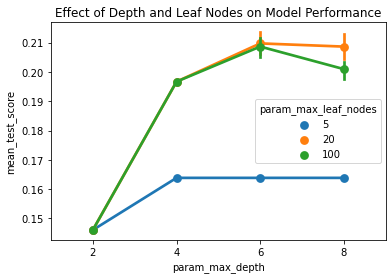

In [32]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [35]:
# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.217
MSE::-785.959


In [36]:
# KNN REGRESSOR HIPERPARAMETER TUNING

In [37]:
algorithm = KNeighborsRegressor()

In [39]:
# Create 3 folds
from sklearn.model_selection import KFold
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [43]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance']}]

In [44]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [45]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.299652988564284
KNeighborsRegressor(n_neighbors=10)
{'n_neighbors': 10, 'weights': 'uniform'}


In [46]:
#RANDOM FOREST HIPERPARAMETER TUNING

In [47]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [48]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 32.8min


In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, y)
base_accuracy = evaluate(base_model, X, y)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X, y)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
grid_search.fit(X, y);

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, X, y)